In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
%matplotlib inline
import nltk
from collections import Counter

In [2]:
df = pd.read_csv(r"D:\a_major_project\fake_or_real_news\fake_or_real_news\fake_or_real_news.csv")

In [3]:
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [4]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
df.tail()

,Unnamed: 0,title,text,label
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [7]:
df.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [8]:
df.shape

(6335, 4)

In [9]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [10]:
df = df.set_index("Unnamed: 0")

In [11]:
df

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE


In [12]:
df['length_title']=df['title'].apply(len)

In [13]:
df['length_text'] =df['text'].apply(len)

In [14]:
df.head(10)

,title,text,label,length_title,length_text
Unnamed: 0,,,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,28,7518
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,85,2646
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,43,2543
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,84,2660
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,48,1840
6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE,11,13333
7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE,73,3171
95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL,33,783
4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL,63,13863


In [15]:
print('Total no. of words in text',df['length_text'].sum())
print('Total no. of words in title',df['length_title'].sum())

Total no. of words in text 29820431
Total no. of words in title 413534


In [16]:
df['length_title'].describe()

count    6335.000000
mean       65.277664
std        23.733657
min         1.000000
25%        49.000000
50%        64.000000
75%        78.000000
max       289.000000
Name: length_title, dtype: float64

In [17]:
df['length_text'].describe()

count      6335.000000
mean       4707.250355
std        5090.956446
min           1.000000
25%        1741.500000
50%        3642.000000
75%        6192.000000
max      115372.000000
Name: length_text, dtype: float64

In [18]:
df['label'].unique()

array(['FAKE', 'REAL'], dtype=object)

In [19]:
(df['label']).value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [20]:
df.groupby('label').size()

label
FAKE    3164
REAL    3171
dtype: int64

In [21]:
import collections
ctr = collections.Counter(df["label"])
print("Frequency of the elements in the List : ",ctr)

Frequency of the elements in the List :  Counter({'REAL': 3171, 'FAKE': 3164})


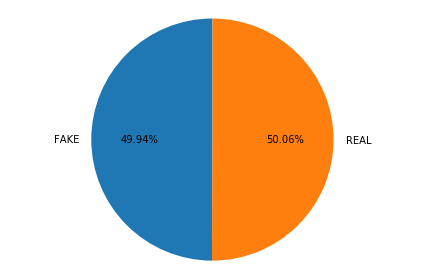

In [22]:
import matplotlib.pyplot as plt
# Pie chart
labels = ctr.keys()
sizes = ctr.values()
# only "explode" the 2nd slice (i.e. 'Hogs')
# explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.2f%%',
        shadow=False, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()

plt.show()

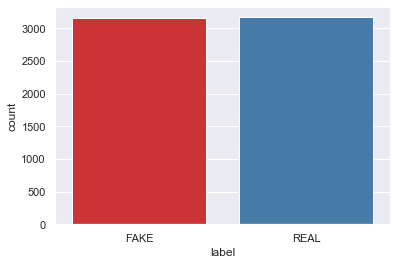

In [23]:
sns.set(style="darkgrid")
sns.countplot(df['label'],palette="Set1",)


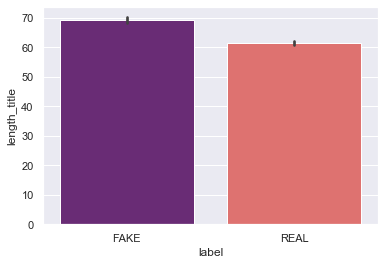

In [30]:
sns.barplot(x=df['label'], y=df['length_title'], data=df, palette = 'magma')


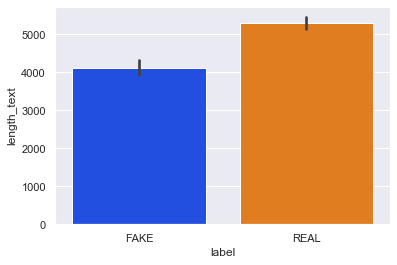

In [36]:
sns.barplot(x=df['label'], y=df['length_text'], data=df, palette= 'bright')

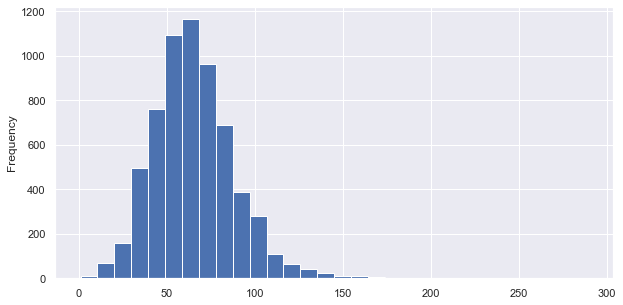

In [26]:
df['length_title'].plot(bins=30,kind = 'hist',figsize = (10,5))

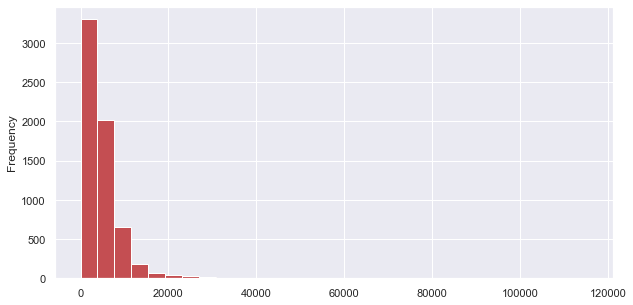

In [40]:
df['length_text'].plot(bins=30,kind = 'hist',figsize = (10,5),color='r')
                      


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BD9118CEC8>,
      dtype=object)

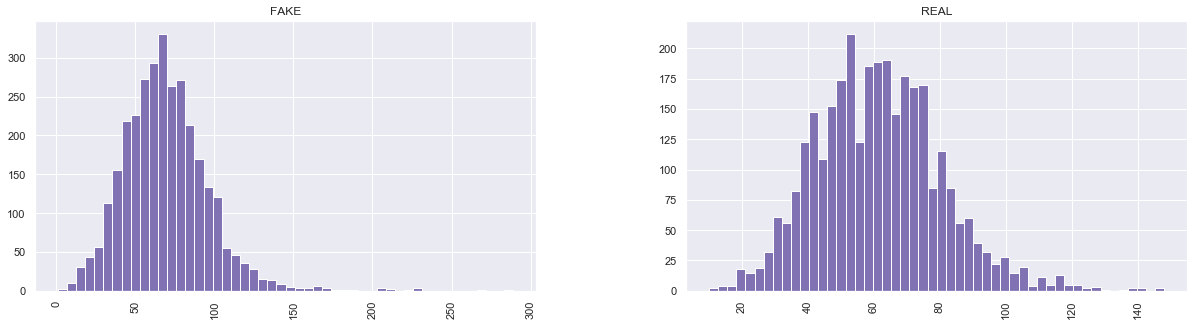

In [41]:
df.hist(column='length_title',by ='label',bins=50,figsize = (20,5),color='m')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BD90E62FC8>,
      dtype=object)

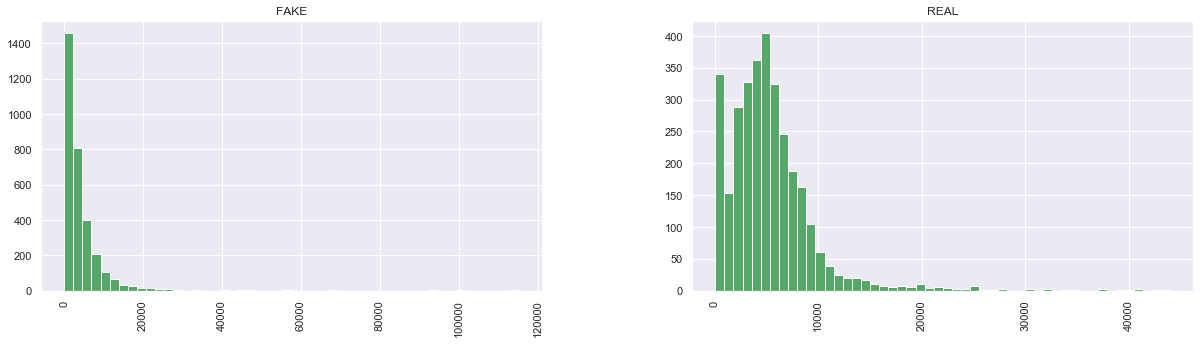

In [42]:
df.hist(column='length_text',by ='label',bins=50,figsize = (20,5),color='g')

In [43]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\IDS-
[nltk_data]     FAKRU\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\IDS-
[nltk_data]     FAKRU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\IDS-
[nltk_data]     FAKRU\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [44]:
import re
from string import punctuation
from nltk.corpus import stopwords
stop_list = stopwords.words('english')+['“', '’','”']

In [45]:
# Fill any blank fields
df.title.fillna("", inplace=True)
df.text.fillna("", inplace=True)


In [46]:
all_text = df.title.str.cat(df.text, sep=' ')

In [47]:
all_text

Unnamed: 0
8476     You Can Smell Hillary’s Fear Daniel Greenfield...
10294    Watch The Exact Moment Paul Ryan Committed Pol...
3608     Kerry to go to Paris in gesture of sympathy U....
10142    Bernie supporters on Twitter erupt in anger ag...
875      The Battle of New York: Why This Primary Matte...
                               ...                        
4490     State Department says it can't find emails fro...
8062     The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
8622     Anti-Trump Protesters Are Tools of the Oligarc...
4021     In Ethiopia, Obama seeks progress on peace, se...
4330     Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: title, Length: 6335, dtype: object

In [48]:
words = nltk.word_tokenize(" ".join(all_text.tolist()))

In [49]:
words

['You',
 'Can',
 'Smell',
 'Hillary',
 '’',
 's',
 'Fear',
 'Daniel',
 'Greenfield',
 ',',
 'a',
 'Shillman',
 'Journalism',
 'Fellow',
 'at',
 'the',
 'Freedom',
 'Center',
 ',',
 'is',
 'a',
 'New',
 'York',
 'writer',
 'focusing',
 'on',
 'radical',
 'Islam',
 '.',
 'In',
 'the',
 'final',
 'stretch',
 'of',
 'the',
 'election',
 ',',
 'Hillary',
 'Rodham',
 'Clinton',
 'has',
 'gone',
 'to',
 'war',
 'with',
 'the',
 'FBI',
 '.',
 'The',
 'word',
 '“',
 'unprecedented',
 '”',
 'has',
 'been',
 'thrown',
 'around',
 'so',
 'often',
 'this',
 'election',
 'that',
 'it',
 'ought',
 'to',
 'be',
 'retired',
 '.',
 'But',
 'it',
 '’',
 's',
 'still',
 'unprecedented',
 'for',
 'the',
 'nominee',
 'of',
 'a',
 'major',
 'political',
 'party',
 'to',
 'go',
 'war',
 'with',
 'the',
 'FBI',
 '.',
 'But',
 'that',
 '’',
 's',
 'exactly',
 'what',
 'Hillary',
 'and',
 'her',
 'people',
 'have',
 'done',
 '.',
 'Coma',
 'patients',
 'just',
 'waking',
 'up',
 'now',
 'and',
 'watching',
 'an'

In [50]:
w=Counter(words)
print(w.most_common(10))

[('the', 260785), (',', 257366), ('.', 204373), ('to', 138702), ('of', 129473), ('and', 113210), ('a', 103897), ('in', 90318), ('that', 68344), ('’', 59841)]


In [51]:
w

Counter({'You': 2695,
         'Can': 362,
         'Smell': 7,
         'Hillary': 7608,
         '’': 59841,
         's': 36409,
         'Fear': 63,
         'Daniel': 97,
         'Greenfield': 17,
         ',': 257366,
         'a': 103897,
         'Shillman': 5,
         'Journalism': 36,
         'Fellow': 33,
         'at': 20183,
         'the': 260785,
         'Freedom': 392,
         'Center': 700,
         'is': 54247,
         'New': 4795,
         'York': 2209,
         'writer': 199,
         'focusing': 179,
         'on': 38973,
         'radical': 386,
         'Islam': 351,
         '.': 204373,
         'In': 8706,
         'final': 752,
         'stretch': 116,
         'of': 129473,
         'election': 4593,
         'Rodham': 125,
         'Clinton': 17861,
         'has': 22509,
         'gone': 518,
         'to': 138702,
         'war': 2814,
         'with': 29859,
         'FBI': 2552,
         'The': 31086,
         'word': 569,
         '“': 35243,
   

In [52]:
len(words)

5783976

In [53]:
from nltk.corpus import stopwords
import string

In [54]:
cleanwords = [i for i in words if i not in (stop_list + list(punctuation)) and i.isalpha() and len(i) > 2]

In [55]:
len(cleanwords)

2745319

In [56]:
from wordcloud import WordCloud, STOPWORDS

wordcloud2 = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=1200,
                          height=1000
                         ).generate(" ".join(cleanwords))

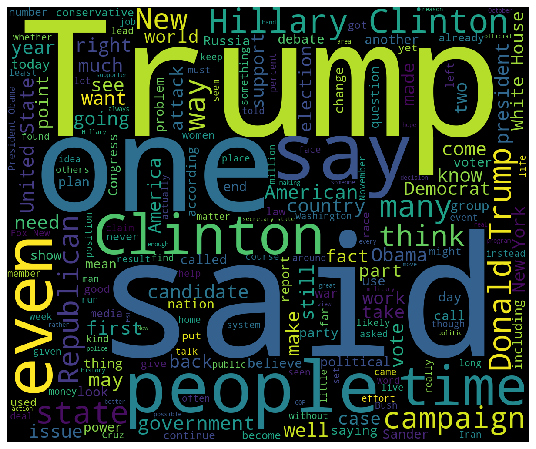

In [59]:
plt.figure(figsize = (15,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.show();

In [60]:
bigrams = nltk.bigrams(cleanwords)

In [61]:
counter = Counter(bigrams)
print(counter.most_common(10))

[(('Hillary', 'Clinton'), 4519), (('Donald', 'Trump'), 4019), (('United', 'States'), 2999), (('White', 'House'), 2399), (('New', 'York'), 2171), (('President', 'Obama'), 1220), (('Fox', 'News'), 1178), (('New', 'Hampshire'), 1010), (('Supreme', 'Court'), 997), (('Barack', 'Obama'), 961)]


In [62]:
num_to_show = 30

labels = [" ".join(e[0]) for e in counter.most_common(num_to_show)]
values = [e[1] for e in counter.most_common(num_to_show)]

indexes = np.arange(len(labels))
width = 1


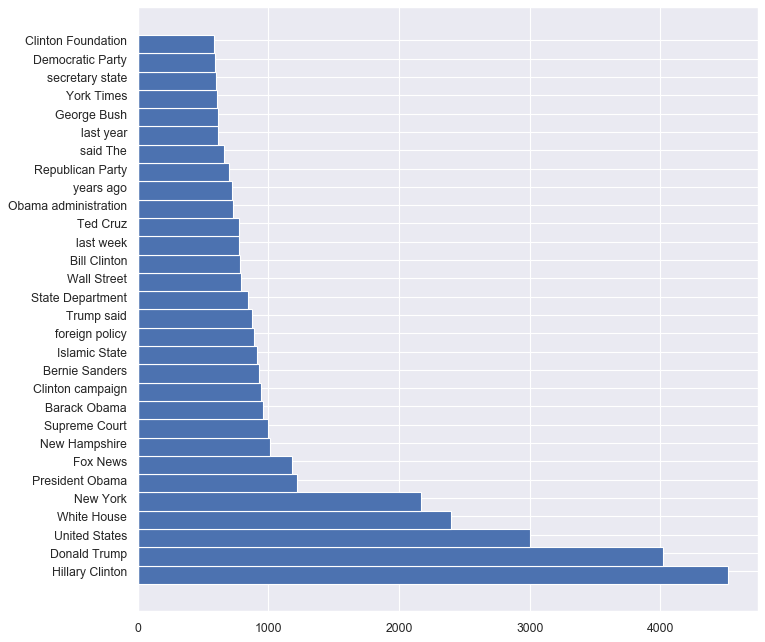

In [63]:
fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.barh(indexes, values, width)
plt.yticks(indexes + width * 0.2, labels)
plt.show()

In [64]:
df.drop(columns=['length_title','length_text'], axis=1, inplace=True)

In [65]:
df

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE


In [66]:
df['combined_text'] = df.title + ' ' + df.text
df.head()

,title,text,label,combined_text
Unnamed: 0,,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,You Can Smell Hillary’s Fear Daniel Greenfield...
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,Kerry to go to Paris in gesture of sympathy U....
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,Bernie supporters on Twitter erupt in anger ag...
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,The Battle of New York: Why This Primary Matte...


In [67]:
df.drop(columns=['title','text'], axis=1, inplace=True)

In [68]:
df.head()

,label,combined_text
Unnamed: 0,,
8476,FAKE,You Can Smell Hillary’s Fear Daniel Greenfield...
10294,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...
3608,REAL,Kerry to go to Paris in gesture of sympathy U....
10142,FAKE,Bernie supporters on Twitter erupt in anger ag...
875,REAL,The Battle of New York: Why This Primary Matte...


In [69]:
df['combined_text']

Unnamed: 0
8476     You Can Smell Hillary’s Fear Daniel Greenfield...
10294    Watch The Exact Moment Paul Ryan Committed Pol...
3608     Kerry to go to Paris in gesture of sympathy U....
10142    Bernie supporters on Twitter erupt in anger ag...
875      The Battle of New York: Why This Primary Matte...
                               ...                        
4490     State Department says it can't find emails fro...
8062     The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
8622     Anti-Trump Protesters Are Tools of the Oligarc...
4021     In Ethiopia, Obama seeks progress on peace, se...
4330     Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: combined_text, Length: 6335, dtype: object

In [70]:
df['label'] = df['label'].map( {'REAL':0, 'FAKE':1} )

In [71]:
df

,label,combined_text
Unnamed: 0,,
8476,1,You Can Smell Hillary’s Fear Daniel Greenfield...
10294,1,Watch The Exact Moment Paul Ryan Committed Pol...
3608,0,Kerry to go to Paris in gesture of sympathy U....
10142,1,Bernie supporters on Twitter erupt in anger ag...
875,0,The Battle of New York: Why This Primary Matte...
...,...,...
4490,0,State Department says it can't find emails fro...
8062,1,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
8622,1,Anti-Trump Protesters Are Tools of the Oligarc...


In [72]:
y=df.label

In [73]:
y

Unnamed: 0
8476     1
10294    1
3608     0
10142    1
875      0
        ..
4490     0
8062     1
8622     1
4021     0
4330     0
Name: label, Length: 6335, dtype: int64

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['combined_text'], y, test_size=0.33, random_state=53)

In [75]:
X_train

Unnamed: 0
8055    A Reader Refers Us To Englishman Pat Condell O...
5656    Do you think there will be as many doom sayers...
669     Bernie's California endgame The election in 23...
5630    They Said What?!: Find Out What Liam Neeson, L...
9797    Wells Fargo is Rotting from the Top Down Wells...
                              ...                        
4514    A new 9/11 memorial to Flight 93: ‘Our loved o...
720     Trump Hits 'Magic Number' of Delegates Require...
444     3 reasons the economy boomed in 2015 December'...
726     Trump Willing to Meet N.Korea's Kim, Wants to ...
806     Cruz campaign: We could have stopped Trump if ...
Name: combined_text, Length: 4244, dtype: object

In [76]:
X_train.shape

(4244,)

In [77]:
X_test

Unnamed: 0
4856     Trump Threatens Lawsuit Against Slanted New Yo...
5323     Planned Parenthood: Abortion pill usage now ri...
4265     National Review disses Donald Trump: Why the m...
1697     Poll: Donald Trump, Ben Carson dominate GOP fi...
3809     Obama administration announces halt on new coa...
                               ...                        
103      Starbucks baristas stop writing 'Race Together...
10143    Poll: 41 percent of voters say election could ...
395      Barbara Mikulski , the longest serving female ...
7696     23 Things to Do to Improve Your Mental Health ...
1679     Why Jeb Bush’s campaign has gone so wrong The ...
Name: combined_text, Length: 2091, dtype: object

In [78]:
X_test.shape

(2091,)

In [79]:
y_train

Unnamed: 0
8055    1
5656    1
669     0
5630    1
9797    1
       ..
4514    0
720     0
444     0
726     0
806     0
Name: label, Length: 4244, dtype: int64

In [80]:
y_train.shape

(4244,)

In [81]:
y_test

Unnamed: 0
4856     0
5323     1
4265     0
1697     0
3809     0
        ..
103      0
10143    1
395      0
7696     1
1679     0
Name: label, Length: 2091, dtype: int64

In [82]:
y_test.shape

(2091,)

In [83]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [84]:
def token_lemmatize(text):
    tokens = nltk.word_tokenize(text)
    tokens= [i for i in tokens if i not in (stop_list + list(punctuation)) and i.isalpha() and len(i) > 2]
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]',token):
            filtered_tokens.append(token)
    lemmatize= [wordnet_lemmatizer.lemmatize(t) for t in filtered_tokens]
    return lemmatize

In [85]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

In [86]:
tfidf_vectorizer = TfidfVectorizer(max_features=200000,
                                  min_df=0.1,stop_words='english',
                                 use_idf=True, ngram_range=(1,3),tokenizer=token_lemmatize,analyzer = 'word')
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

C:\Users\IDS-FAKRU\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['le'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [87]:
tfidf_vectorizer.get_feature_names()[-10:]

['woman',
 'word',
 'work',
 'working',
 'world',
 'wrote',
 'year',
 'year ago',
 'york',
 'young']

In [88]:
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())
tfidf_df.head(10)

,able,according,act,action,actually,added,address,administration,agency,ago,...,woman,word,work,working,world,wrote,year,year ago,york,young
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.092693,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.020893,0.0,0.000000,...,0.00000,0.000000,0.034181,0.021097,0.016492,0.0,0.061875,0.000000,0.059411,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.12001,0.0,0.000000,0.0,0.114079,...,0.00000,0.000000,0.000000,0.000000,0.092750,0.0,0.069595,0.136369,0.000000,0.000000
7,0.034265,0.026770,0.033043,0.032862,0.032366,0.00000,0.0,0.000000,0.0,0.000000,...,0.00000,0.033413,0.000000,0.000000,0.026188,0.0,0.000000,0.000000,0.157233,0.000000
8,0.000000,0.130602,0.064481,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.031428,...,0.02993,0.032602,0.026479,0.032686,0.000000,0.0,0.000000,0.000000,0.000000,0.037518
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.072401,0.0,0.000000,0.000000,0.000000,0.000000


In [90]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics

model_p = PassiveAggressiveClassifier()
model_p.fit(tfidf_train,y_train)
model_pred= model_p.predict(tfidf_test)
model_score = metrics.accuracy_score(y_test, model_pred)
model_score = model_score*100
training_score= model_p.score(tfidf_train, y_train)
training_score = training_score*100
testing_score = model_p.score(tfidf_test, y_test)
testing_score = testing_score *100


print("Accuracy score of PassiveAggressiveClassifier is", model_score)
print("Accuracy of classifier on training set:",training_score)  
print("Accuracy of classifier on test set: ",testing_score)
     

Accuracy score of PassiveAggressiveClassifier is 84.60066953610712
Accuracy of classifier on training set: 92.27144203581527
Accuracy of classifier on test set:  84.60066953610712


In [91]:
count_vectorizer = CountVectorizer(max_features=200000,
                                 min_df=0.1, stop_words='english',
                                  ngram_range=(1,3),tokenizer=token_lemmatize,analyzer = 'word')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

C:\Users\IDS-FAKRU\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['le'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [92]:
count_vectorizer.get_feature_names()[:10]

['able',
 'according',
 'act',
 'action',
 'actually',
 'added',
 'address',
 'administration',
 'agency',
 'ago']

In [93]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())
count_df.head(10)

,able,according,act,action,actually,added,address,administration,agency,ago,...,woman,word,work,working,world,wrote,year,year ago,york,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,0,0,1,0,0,...,0,0,2,1,1,0,5,0,3,0
6,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,1,1,0,0
7,1,1,1,1,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,5,0
8,0,5,2,0,0,0,0,0,0,1,...,1,1,1,1,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [94]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics

model_p = PassiveAggressiveClassifier()
model_p.fit(count_train,y_train)
model_pred= model_p.predict(count_test)
model_score = metrics.accuracy_score(y_test, model_pred)
model_score = model_score*100
training_score= model_p.score(count_train, y_train)
training_score = training_score*100
testing_score = model_p.score(count_test, y_test)
testing_score = testing_score *100


print("Accuracy score of PassiveAggressiveClassifier is", model_score)
print("Accuracy of classifier on training set:",training_score)  
print("Accuracy of classifier on test set: ",testing_score)
     

Accuracy score of PassiveAggressiveClassifier is 80.34433285509326
Accuracy of classifier on training set: 86.05089538171536
Accuracy of classifier on test set:  80.34433285509326


In [95]:
t=tfidf_vectorizer.get_feature_names()
c=count_vectorizer.get_feature_names()
set(t)==set(c)

True

In [96]:
difference = set(count_df.columns) - set(tfidf_df.columns)

In [97]:
print(count_df.equals(tfidf_df))

False


In [98]:
hash_vectorizer = HashingVectorizer(stop_words='english',alternate_sign= False, ngram_range=(1, 3),
                                    tokenizer=token_lemmatize,analyzer = 'word')
hash_train = hash_vectorizer.fit_transform(X_train)
hash_test = hash_vectorizer.transform(X_test)

C:\Users\IDS-FAKRU\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
C:\Users\IDS-FAKRU\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['le'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [99]:
hash_train.shape

(4244, 1048576)

In [100]:
hash_vectorizer.get_stop_words()

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [101]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics

model_p = PassiveAggressiveClassifier()
model_p.fit(hash_train,y_train)
model_pred= model_p.predict(hash_test)
model_score = metrics.accuracy_score(y_test, model_pred)
model_score = model_score*100
training_score= model_p.score(hash_train, y_train)
training_score = training_score*100
testing_score = model_p.score(hash_test, y_test)
testing_score = testing_score *100


print("Accuracy score of PassiveAggressiveClassifier is", model_score)
print("Accuracy of classifier on training set:",training_score)  
print("Accuracy of classifier on test set: ",testing_score)
     

Accuracy score of PassiveAggressiveClassifier is 92.96987087517934
Accuracy of classifier on training set: 100.0
Accuracy of classifier on test set:  92.96987087517934


In [102]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import (RidgeClassifier,SGDClassifier)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import (BernoulliNB,ComplementNB)


from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier


from sklearn.svm import (LinearSVC,NuSVC,SVC)



from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [103]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('PS', PassiveAggressiveClassifier()))
models.append(('RC', RidgeClassifier()))
models.append(('DT', DecisionTreeClassifier()))
# Naive Bayes models

models.append(('MNB', MultinomialNB()))
models.append(('BNB', BernoulliNB()))
models.append(('CNB', ComplementNB()))


models.append(('RF', RandomForestClassifier()))
models.append(('BG', BaggingClassifier()))
models.append(('ET', ExtraTreesClassifier()))
models.append(('ADB', AdaBoostClassifier()))
models.append(('GB', GradientBoostingClassifier()))

In [104]:
models2 = []
models2.append(('LSVC', LinearSVC()))
models2.append(('SGD', SGDClassifier()))
models2.append(('XGB', XGBClassifier()))


In [147]:
names = []
scores = []
for name, model in models:
    model.fit(tfidf_train, y_train)
    y_pred = model.predict(tfidf_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split2 = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split2)

   Name     Score
0   KNN  0.804400
1    LR  0.862267
2    PS  0.850789
3    RC  0.851267
4    DT  0.786705
5   MNB  0.820182
6   BNB  0.733620
7   CNB  0.818269
8    RF  0.886657
9    BG  0.841224
10   ET  0.883788
11  ADB  0.846007
12   GB  0.871832


In [148]:
names = []
scores = []
for name, model in models2:
    model.fit(tfidf_train, y_train)
    y_pred = model.predict(tfidf_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split3 = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split3)

   Name     Score
0  LSVC  0.854615
1   SGD  0.857484
2   XGB  0.892396


In [149]:
result1 = tr_split2.append(tr_split3, sort=False)
result1.insert(0, 'New_ID', range(1, 1 + len(result1)))
result1 = result1.set_index('New_ID')

In [150]:
result1

,Name,Score
New_ID,,
1,KNN,0.804400
2,LR,0.862267
3,PS,0.850789
4,RC,0.851267
5,DT,0.786705
6,MNB,0.820182
7,BNB,0.733620
8,CNB,0.818269
9,RF,0.886657


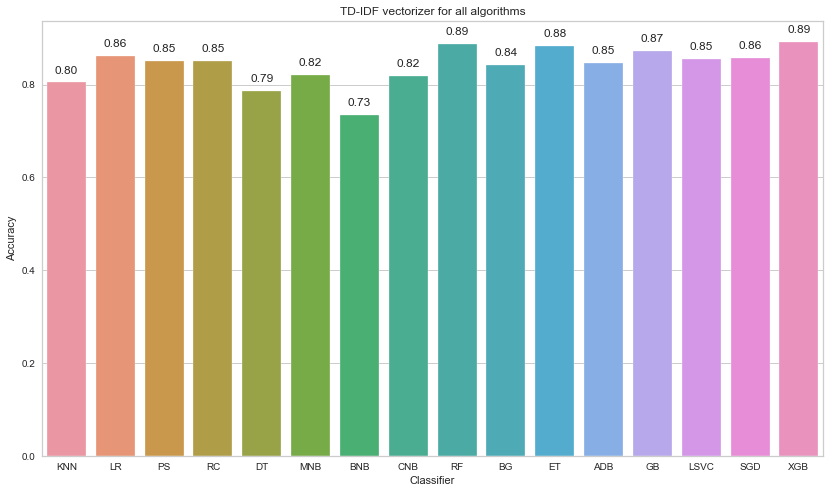

In [305]:
plt.figure(figsize=(14, 8))
axis = sns.barplot(x = 'Name', y = 'Score', data = result1)
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.020, '{:1.2f}'.format(height), ha="center") 
plt.title("TD-IDF vectorizer for all algorithms")    
plt.show()


In [181]:
gph = result1[result1.Score == result1.Score.max()] 
gph.insert(2, "Vectorizer", ['TD-IDF vectorizer'], True) 
gph

,Name,Score,Vectorizer
New_ID,,,
16,XGB,0.892396,TD-IDF vectorizer


In [154]:
names = []
scores = []
for name, model in models:
    model.fit(count_train, y_train)
    y_pred = model.predict(count_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split4 = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split4)

C:\Users\IDS-FAKRU\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


   Name     Score
0   KNN  0.810617
1    LR  0.830225
2    PS  0.787183
3    RC  0.813965
4    DT  0.795313
5   MNB  0.813008
6   BNB  0.733620
7   CNB  0.813965
8    RF  0.890005
9    BG  0.831659
10   ET  0.878527
11  ADB  0.843615
12   GB  0.869440


In [155]:
names = []
scores = []
for name, model in models2:
    model.fit(count_train, y_train)
    y_pred = model.predict(count_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split5 = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split5)

C:\Users\IDS-FAKRU\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


   Name     Score
0  LSVC  0.830225
1   SGD  0.813965
2   XGB  0.882831


In [156]:
result2 = tr_split4.append(tr_split5, sort=False)
result2.insert(0, 'New_ID', range(1, 1 + len(result2)))
result2 = result2.set_index('New_ID')

In [157]:
result2

,Name,Score
New_ID,,
1,KNN,0.810617
2,LR,0.830225
3,PS,0.787183
4,RC,0.813965
5,DT,0.795313
6,MNB,0.813008
7,BNB,0.733620
8,CNB,0.813965
9,RF,0.890005


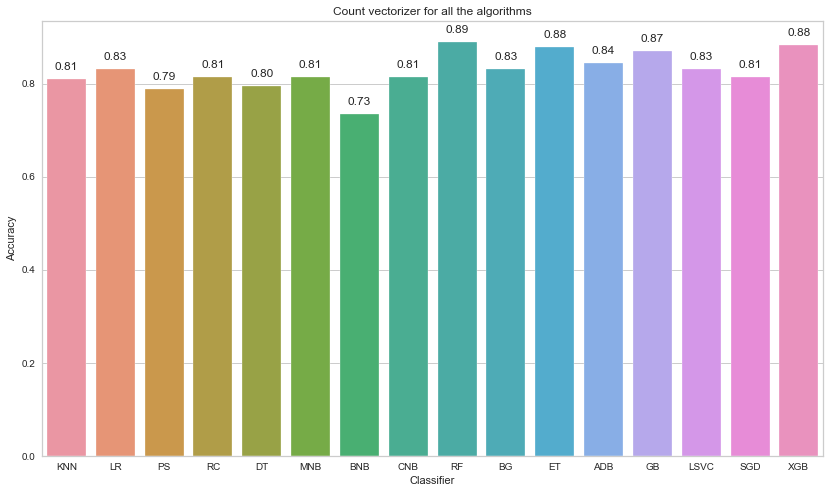

In [306]:
plt.figure(figsize=(14, 8))
axis = sns.barplot(x = 'Name', y = 'Score', data = result2)
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.020, '{:1.2f}'.format(height), ha="center") 
plt.title('Count vectorizer for all the algorithms')    
plt.show()

In [182]:
gph1 = result2[result2.Score == result2.Score.max()] 
gph1.insert(2, "Vectorizer", ['Count vectorizer'], True) 
gph1

,Name,Score,Vectorizer
New_ID,,,
9,RF,0.890005,Count vectorizer


In [105]:
names = []
scores = []
for name, model in models:
    model.fit(hash_train, y_train)
    y_pred = model.predict(hash_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

   Name     Score
0   KNN  0.813486
1    LR  0.883309
2    PS  0.928742
3    RC  0.919656
4    DT  0.798183
5   MNB  0.841703
6   BNB  0.740316
7   CNB  0.829747
8    RF  0.883309
9    BG  0.858441
10   ET  0.891918
11  ADB  0.859397
12   GB  0.879484


In [106]:
names = []
scores = []
for name, model in models2:
    model.fit(hash_train, y_train)
    y_pred = model.predict(hash_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split1 = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split1)

   Name     Score
0  LSVC  0.921090
1   SGD  0.928264
2   XGB  0.910091


In [107]:
result = tr_split.append(tr_split1, sort=False)

In [108]:
result

,Name,Score
0,KNN,0.813486
1,LR,0.883309
2,PS,0.928742
3,RC,0.919656
4,DT,0.798183
5,MNB,0.841703
6,BNB,0.740316
7,CNB,0.829747
8,RF,0.883309
9,BG,0.858441


In [109]:
result.insert(0, 'New_ID', range(1, 1 + len(result)))

In [110]:
result

,New_ID,Name,Score
0,1,KNN,0.813486
1,2,LR,0.883309
2,3,PS,0.928742
3,4,RC,0.919656
4,5,DT,0.798183
5,6,MNB,0.841703
6,7,BNB,0.740316
7,8,CNB,0.829747
8,9,RF,0.883309
9,10,BG,0.858441


In [111]:
result = result.set_index('New_ID')

In [112]:
result

,Name,Score
New_ID,,
1,KNN,0.813486
2,LR,0.883309
3,PS,0.928742
4,RC,0.919656
5,DT,0.798183
6,MNB,0.841703
7,BNB,0.740316
8,CNB,0.829747
9,RF,0.883309


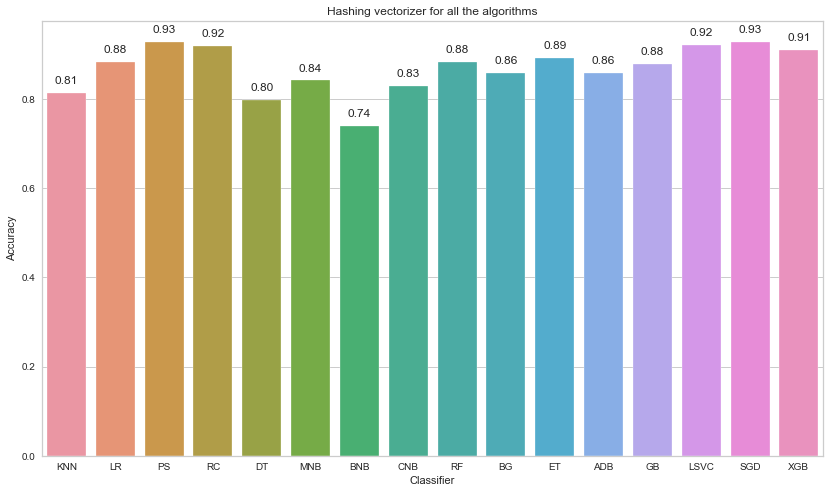

In [307]:
plt.figure(figsize=(14, 8))
axis = sns.barplot(x = 'Name', y = 'Score', data = result)
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.020, '{:1.2f}'.format(height), ha="center") 
plt.title('Hashing vectorizer for all the algorithms')    
plt.show()

In [114]:
max_value = result["Score"].max()
print(max_value)

0.9287422285987565


In [168]:
print(result.loc[result.Score.idxmax()])


Name           PS
Score    0.928742
Name: 3, dtype: object


In [189]:
gph2 = result[result.Score == result.Score.max()] 
gph2.insert(2, "Vectorizer", ['Hash vectorizer'], True) 
gph2 

,Name,Score,Vectorizer
New_ID,,,
3,PS,0.928742,Hash vectorizer


In [190]:
fin = gph.append(gph1, sort=False)

In [191]:
fin

,Name,Score,Vectorizer
New_ID,,,
16,XGB,0.892396,TD-IDF vectorizer
9,RF,0.890005,Count vectorizer


In [270]:
final = fin.append(gph2, sort=False)
final['Accuracy_Score']= final.Score*100
final.drop(columns=['Score'], axis=1, inplace=True)
final

,Name,Vectorizer,Accuracy_Score
New_ID,,,
16,XGB,TD-IDF vectorizer,89.239598
9,RF,Count vectorizer,89.000478
3,PS,Hash vectorizer,92.874223


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


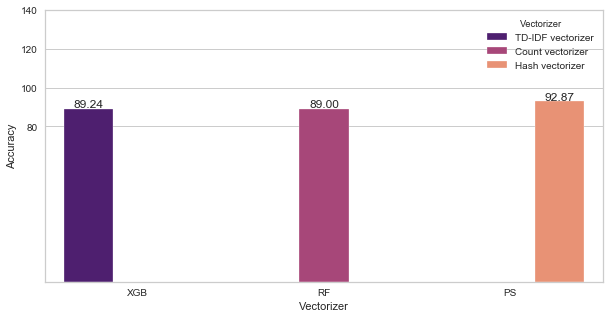

In [303]:
plt.figure(figsize=(10, 5))
axis = sns.barplot(x = 'Name', y = 'Accuracy_Score',hue= 'Vectorizer', data = final, palette = 'magma')
axis.set(xlabel='Vectorizer', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x()+ p.get_width()/2, height + 0.750, '{:1.2f}'.format(height),ha='center')    
plt.yticks(np.arange(80,160,step=20))    
plt.show()

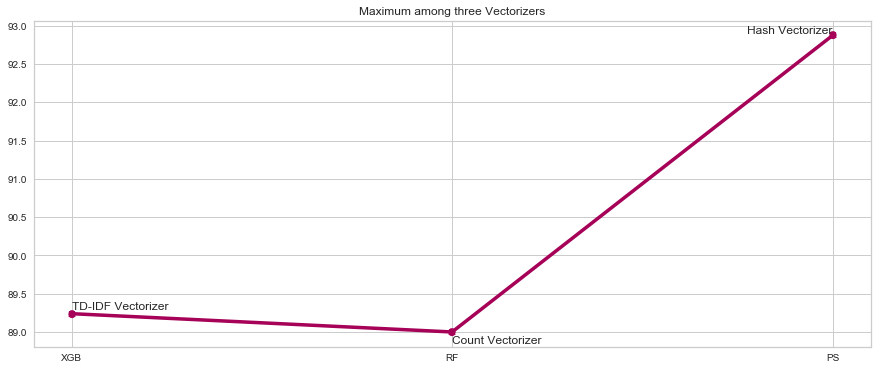

In [311]:
plt.figure(figsize=(15, 6))
plt.plot('Name','Accuracy_Score',data = final,ls='-',lw=3.50, marker="*",markeredgewidth=3.50,markerfacecolor='g',color='m')
plt.text('XGB',89.30,'TD-IDF Vectorizer')
plt.text('RF',88.85,'Count Vectorizer',horizontalalignment='left')
plt.text('PS',92.90,'Hash Vectorizer',horizontalalignment='right')
plt.title('Maximum among three Vectorizers')
plt.show()

In [131]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics

model_p = PassiveAggressiveClassifier()
model_p.fit(hash_train,y_train)
model_pred= model_p.predict(hash_test)
model_score = metrics.accuracy_score(y_test, model_pred)
model_score = model_score*100
training_score= model_p.score(hash_train, y_train)
training_score = training_score*100
testing_score = model_p.score(hash_test, y_test)
testing_score = testing_score *100

print("Accuracy score of PassiveAggressiveClassifier is", model_score)
print("Accuracy of classifier on training set:",training_score)  
print("Accuracy of classifier on test set: ",testing_score)
     

Accuracy score of PassiveAggressiveClassifier is 92.87422285987566
Accuracy of classifier on training set: 100.0
Accuracy of classifier on test set:  92.87422285987566


In [147]:
sgd = SGDClassifier()
sgd.fit(hash_train, y_train)
sgd_pred= sgd.predict(hash_test)
sgd_score = metrics.accuracy_score(y_test, sgd_pred)
sgd_score = sgd_score * 100

print("Accuracy score of SGD Classifier is ",sgd_score)
print('Accuracy of SGDClassifier on training set: {:.2f}'
     .format(sgd.score(hash_train, y_train)))
print('Accuracy of SGDClassifier on test set: {:.2f}'
     .format(sgd.score(hash_test, y_test)))

Accuracy score of SGD Classifier is  92.82639885222382
Accuracy of SGDClassifier on training set: 1.00
Accuracy of SGDClassifier on test set: 0.93


In [132]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, model_pred)
print(cm)      


[[985  98]
 [ 51 957]]


C:\Users\IDS-FAKRU\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\IDS-FAKRU\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


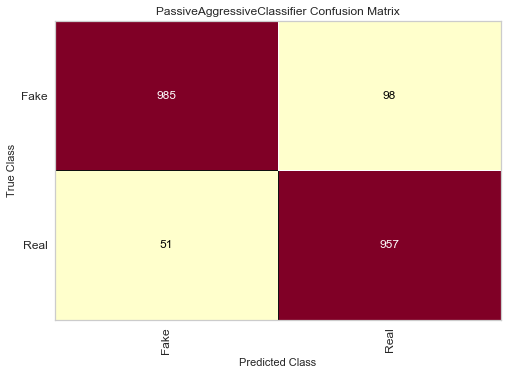

In [133]:
from yellowbrick.classifier import ConfusionMatrix
classNames = ['Fake','Real']
cm1 = ConfusionMatrix(model_p, classes=classNames)
cm1.fit(hash_train, y_train)
cm1.score(hash_test, y_test)
cm1.show()

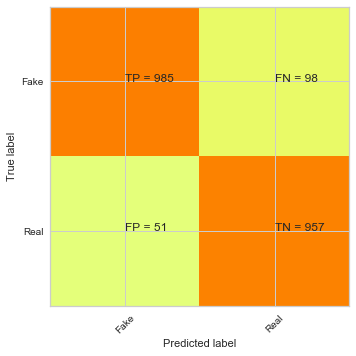

In [134]:
from sklearn.metrics import plot_confusion_matrix
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Fake','Real']
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TP','FN'], ['FP', 'TN']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [135]:
from sklearn.metrics import classification_report
target_names = ['Fake','Real']
print(classification_report(y_test, model_pred,target_names = target_names))

              precision    recall  f1-score   support

        Fake       0.95      0.91      0.93      1083
        Real       0.91      0.95      0.93      1008

    accuracy                           0.93      2091
   macro avg       0.93      0.93      0.93      2091
weighted avg       0.93      0.93      0.93      2091



C:\Users\IDS-FAKRU\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


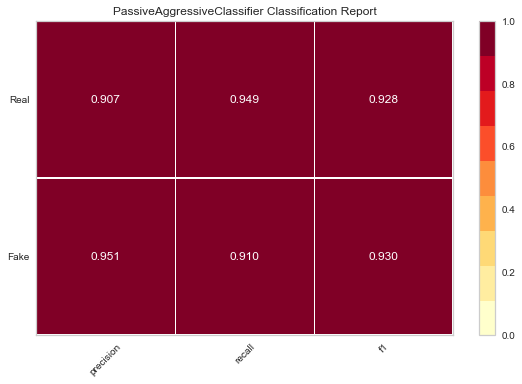

In [137]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer

visualizer = ClassificationReport(model_p, classes=['Fake','Real'])
visualizer.fit(hash_train, y_train) # Fit the training data to the visualizer
visualizer.score(hash_test, y_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data
#visualizer.show()


In [138]:
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, model_pred))

0.9287422285987565
0.9287422285987565


In [139]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, model_pred))

0.07125777140124342
0.07125777140124345


In [140]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, model_pred))

0.9494047619047619
0.9494047619047619


In [141]:
specificity = TN / (TN + FP)

print(specificity)

0.9095106186518929


In [142]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.0904893813481071
0.09048938134810713


In [ ]:
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test, model_pred))

In [ ]:
from sklearn.neural_network import MLPClassifier
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.fit_transform(X_test)

mlp = MLPClassifier(max_iter=1000, alpha=1,random_state=0)

mlp.fit(hash_train, y_train)
mlp_pred= mlp.predict(hash_test)
mlp_score = metrics.accuracy_score(y_test, mlp_pred)
mlp_score = mlp_score * 100

print("Accuracy score of MLP Classifier is ",mlp_score)
print("Accuracy on training set: {:.3f}".format(
    mlp.score(hash_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(hash_test, y_test))) 

C:\Users\IDS-FAKRU\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


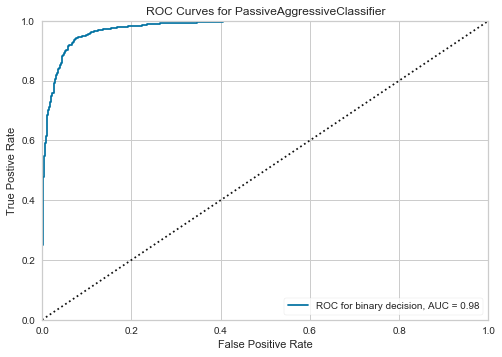

In [146]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(model_p, classes=['Fake','Real'], micro=False, macro=False,per_class=False)

visualizer.fit(hash_train, y_train)        # Fit the training data to the visualizer
visualizer.score(hash_test, y_test)        # Evaluate the model on the test data
g1 = visualizer.poof()  